In [71]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [72]:
X_train = np.array([[2104, 5, 1, 45], [1416,3,2,40], [852, 2,1,35]])
X_features = ['Size(sq ft)', '# bedrooms', '# floors', 'age of home' ]
y_train = np.array([460,232,178])

Text(0, 0.5, "Price (1000's of Dollor)")

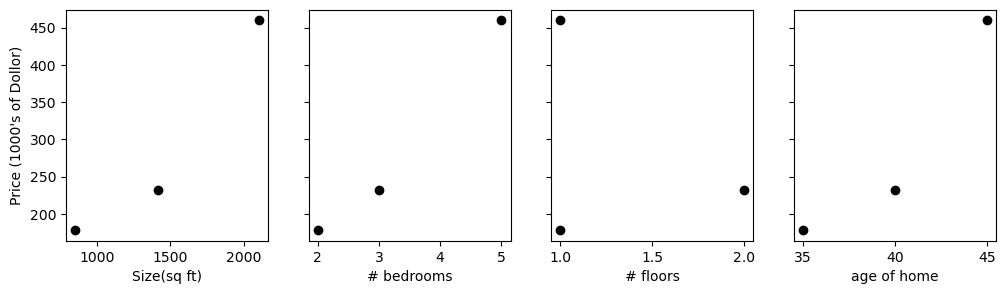

In [73]:
fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, color='black')
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel('Price (1000\'s of Dollor)')

In [74]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [75]:
def predict(w, b, X):
    pred = np.dot(w, X) + b
    return pred

In [76]:
predict(w=w_init, b=b_init, X=X_train[0])

459.9999976194083

## Calculate Cost Function

In [77]:
def cost_function(w, b, X, y):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        pred = predict(w, b, X[i])
        cost += (y[i] - pred)**2
        
    cost = cost/2*m

    return cost   

In [78]:
cost_function(w=w_init, b=b_init, X=X_train, y=y_train)

1.4021013641397007e-11

## Calculate Gradient

In [79]:
np.zeros((4,))

array([0., 0., 0., 0.])

In [85]:
def compute_gradient(w, b, X, y):
    m, n = X.shape
    dw = np.zeros(n,)
    db = 0
    
    for i in range(m):
        err = (np.dot(w,X[i]) + b) - y[i]
        for j in range(n):      
            dw[j] += err * X[i, j]
        db += err
    db = db/m
    dw = dw/m

    return dw, db  

In [87]:
compute_gradient(w=w_init, b=b_init, X=X_train, y=y_train)

(array([-2.72623574e-03, -6.27197255e-06, -2.21745574e-06, -6.92403377e-05]),
 -1.6739251122999121e-06)

In [103]:
def run_gradient_descent(X,y, w_init, b_init, num_of_iter, alpha, cost_function, compute_gradient):
    w = w_init
    b = b_init
    cost_history = []
    wb_history = []

    for i in range(num_of_iter):
        
        cost = cost_function(w=w, b=b, X=X, y=y)
        cost_history.append(cost)
        wb_history.append((w,b))

        # calculate gradient; the derivative term
        dw, db = compute_gradient(w,b, X, y)

        # substitute the w and b with the new.
        w = w - alpha * dw
        b = b - alpha * db

        if i%(num_of_iter//10) == 0:
            print(f"""
            w: {w}
            b: {b}
            cost: {cost}
            """)

    return w, b , cost_history

In [131]:
w_pred,b_pred, cost_history = run_gradient_descent(X=X_train,
                     y=y_train, 
                     w_init=w_init, 
                     b_init=b_init, 
                     num_of_iter=1000, 
                     alpha=1.0e-7, 
                     cost_function=cost_function, 
                     compute_gradient=compute_gradient)


            w: [  0.39133535  18.75376741 -53.36032453 -26.42131618]
            b: 785.1811367994084
            cost: 1.4021013641397007e-11
            

            w: [  0.39133535  18.75376741 -53.36032453 -26.42131618]
            b: 785.1811367994087
            cost: 3.0592859968260063e-15
            

            w: [  0.39133535  18.75376741 -53.36032453 -26.42131618]
            b: 785.1811367994087
            cost: 3.053782137085002e-15
            

            w: [  0.39133535  18.75376741 -53.36032453 -26.42131618]
            b: 785.1811367994087
            cost: 3.048308774698314e-15
            

            w: [  0.39133535  18.75376741 -53.36032453 -26.42131618]
            b: 785.1811367994087
            cost: 3.042810560406829e-15
            

            w: [  0.39133535  18.75376741 -53.36032453 -26.42131618]
            b: 785.1811367994087
            cost: 3.0373558454305706e-15
            

            w: [  0.39133535  18.75376741 -53.36032453 -26.4

Text(0.5, 1.0, 'Cost vs. # of Iterations')

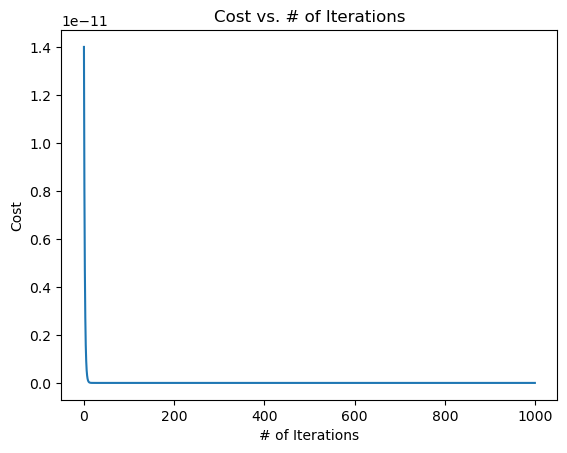

In [142]:
plt.plot([x for x in range(len(cost_history))],cost_history)
plt.xlabel('# of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. # of Iterations')

## Making prediciton

In [140]:
for i in range(X_train.shape[0]):
    pred = np.dot(w_pred, X_train[i]) + b
    print(f"""
        prediction: {pred: .2f}
        actual: {y_train[i]}
    
    """)


        prediction:  460.00
        actual: 460
    
    

        prediction:  232.00
        actual: 232
    
    

        prediction:  178.00
        actual: 178
    
    


## Z-Score Normalization

After z-score normalization, all features will have a mean of 0 and standard deviation of 1.

To implement z-score normalization, adjust your input values as show in the formula below:

$ x_j^{(i)} = \frac{ x_j^{(i)} - \mu_j}{\sigma_j}$


where, *j* selects a feature or a column in the **X** matrix. $\mu_j$ is the mean of all the values for freature(j) and $\sigma_j$ is the standard deviation of feature(j):

$\mu_j = \frac{1}{m} \sum_{i=0}^{m-1}x_j^{(i)}$

$\sigma_j^2 = \frac{1}{m}\sum_{i=0}^{m-1} (x_j^{(i)} - \mu_j)^2$

In [145]:
def zscore_normalize_feature(X):
    m,n = X.shape

    # mean of values in  each column/feature
    mu = np.mean(X, axis=0)

    # standard deviation of each column/feature
    sigma = np.std(X, axis=0)

    X_norm = (X-mu)/sigma

    return (mu, sigma, X_norm)
    

### Normalising the original features

In [151]:
mu, sigma, X_normalized = zscore_normalize_feature(X_train)

In [155]:
X_normalized

array([[ 1.26311506,  1.33630621, -0.70710678,  1.22474487],
       [-0.08073519, -0.26726124,  1.41421356,  0.        ],
       [-1.18237987, -1.06904497, -0.70710678, -1.22474487]])